In [2]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df = pd.read_csv("../Hasil Scrap/data_hasil_scrap_positive.csv")
df.tail(2)

,url,text
178,https://www.zenius.net/blog/rangkuman-mata-pel...,home zenius insights mata pelajaran kampus uji...
179,https://primaindisoft.com/kelas-1/,untuk anak contoh materi sekolah kursus online...


In [3]:
df = df[['url','text']]
df.tail(2)

,url,text
178,https://www.zenius.net/blog/rangkuman-mata-pel...,home zenius insights mata pelajaran kampus uji...
179,https://primaindisoft.com/kelas-1/,untuk anak contoh materi sekolah kursus online...


In [4]:
# Mencari nilai NaN di kolom 'tweet' menggunakan isna() dan menghitung jumlahnya
nan_count = df['text'].isna().sum()

# Menghitung jumlah data kosong di kolom "text"
jumlah_data_kosong = df['text'].str.strip().eq('').sum()

# Menampilkan jumlah nilai NaN
print("Jumlah nilai NaN di kolom 'text':", nan_count)
print("Jumlah nilai '' di kolom 'text':", jumlah_data_kosong)

Jumlah nilai NaN di kolom 'text': 0
Jumlah nilai '' di kolom 'text': 0


<h4><b>Word Cloud Awal

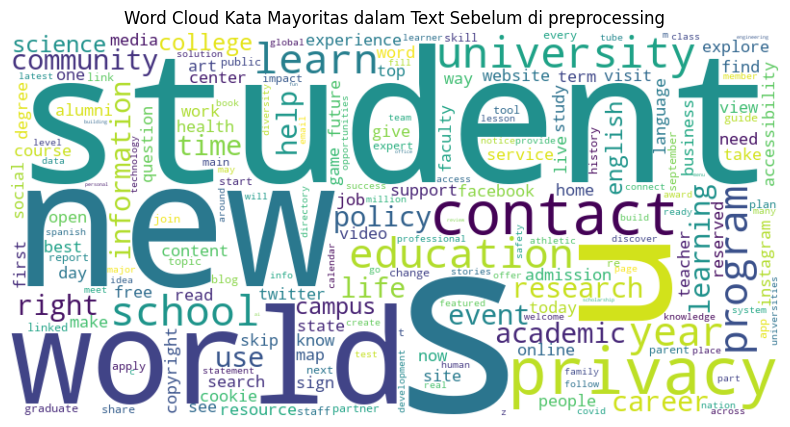

In [5]:
tes = df['text'].to_list()
# Menggabungkan semua kata dalam kolom tweet
all_words = ' '.join(tes)

# Membuat objek WordCloud
wordcloud = WordCloud(width=800, height=400, collocations=False, background_color='white').generate(all_words)

# Menampilkan Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Kata Mayoritas dalam Text Sebelum di preprocessing')
plt.show()

In [6]:
df['text'][0]


'wikipedia the free encyclopedia english 6 715 000+ articles 日本語 1 387 記事 español 892 artículos русский 938 статей deutsch 2 836 artikel français 553 italiano 826 voci 中文 377 条目 / 條目 português 109 artigos العربية 217 مقالة search en afrikaans polski asturianu azərbaycanca български বাংলা беларуская català čeština cymraeg dansk eesti ελληνικά esperanto euskara فارسی galego 한국어 हिन्दी hrvatski bahasa indonesia עברית ქართული latina latviešu lietuvių magyar македонски مصرى melayu bahaso minangkabau nederlands norsk (bokmål) (nynorsk) нохчийн oʻzbekcha ўзбекча қазақша qazaqşa قازاقشا română simple sinugboanong binisaya slovenčina slovenščina српски srpski srpskohrvatski српскохрватски suomi svenska தமிழ் татарча tatarça ภาษาไทย тоҷикӣ تۆرکجه türkçe українська اردو tiếng việt winaray հայերեն မြန်မာဘာသာ read in your language is hosted by wikimedia foundation, a non-profit organization that also hosts range of other projects. you can support our work with donation. download for android or i os

<h4><b>Fix Contraction

In [7]:
with open('../Prepo/kbba.txt', 'r', encoding='utf-8') as file:
    lines = file.readlines()

data = [line.strip().split('\t') for line in lines]
data_singkatan = pd.DataFrame(data, columns=['Contraction', 'Meaning'])

df_en = pd.read_csv("../Prepo/contractions.csv")

# Menggabungkan DataFrames secara vertikal (menambahkan baris)
df_singkatan = pd.concat([data_singkatan, df_en], ignore_index=True)

# Ubah DataFrame menjadi kamus
kontraksi_dict = dict(zip(df_singkatan['Contraction'], data_singkatan['Meaning']))

<h4><b>Prepo

In [8]:
df_awal = df

In [9]:
import re
import nltk
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.StopWordRemover.StopWordRemover import StopWordRemover
from deep_translator import GoogleTranslator

try:
    from nltk.corpus import stopwords
except LookupError:
    # Download stopwords (jika belum diunduh)
    nltk.download('stopwords')
    
try:
    from nltk.stem import PorterStemmer
except LookupError:
    # Download punkt (jika belum diunduh)
    nltk.download('punkt')

# Fungsi untuk menghapus kata-kata dengan satu huruf
def remove_tag(text):
    words = text.split()
    filtered_words = [word for word in words if not word.startswith('#')]  # Menghapus kata-kata yang dimulai dengan '#'
    filtered_words = [word for word in filtered_words if not word.startswith('http')]  # Menghapus kata-kata yang dimulai dengan '#'
    filtered_words = [word for word in filtered_words if not word.startswith('https')]  # Menghapus kata-kata yang dimulai dengan '#'
    return ' '.join(filtered_words)

# Fungsi untuk menghapus tanda baca
def remove_punctuation(text):
    hasil = re.sub(r'[^\w\s]', '', text)
    return hasil

# Fungsi untuk mengatasi kontraksi dalam bahasa Indonesia
def expand_contractions_id(text):
    kontraksi_dict
    
    words = text.split()
    expanded_text = [kontraksi_dict[word] if word in kontraksi_dict else word for word in words]
    return ' '.join(expanded_text)

def ubah_angka(text):
    # Menggunakan regular expression untuk mengganti karakter alay
    teks_benar = re.sub(r'3', 'e', text)
    teks_benar = re.sub(r'4', 'a', teks_benar)
    teks_benar = re.sub(r'1', 'i', teks_benar)
    teks_benar = re.sub(r'0', 'o', teks_benar)
    return teks_benar

def remove_number(text) :
    hasil = re.sub(r'\d', '', text)
    return hasil

# Fungsi untuk menghapus tautan dari teks
def remove_links(text):
    # Menggunakan ekspresi reguler untuk mencari dan menghapus tautan
    return re.sub(r'http\S+|www\S+|https\S+', '', text)

# Fungsi untuk menghapus kata-kata dengan satu huruf
def remove_single_letter_words(text):
    text = re.sub(r'\b\w\b', '', text)
    
    hapus = ['rj','lc','en','ar','mc','vt','rob','ny','dc','az','va']
    words = text.split()

    # Memfilter kata-kata yang tidak ada dalam array yang akan dihapus
    kata_kata_tanpa_kata_yang_dihapus = [kata for kata in words if kata not in hapus]

    # Menggabungkan kata-kata yang tersisa menjadi kalimat baru
    kalimat_tanpa_kata_yang_dihapus = ' '.join(kata_kata_tanpa_kata_yang_dihapus)
    return kalimat_tanpa_kata_yang_dihapus

def translate(text) :
    # to_translate = 'I want to translate this text'
    translated = GoogleTranslator(source='auto', target='en').translate(text)
    return translated

def stem(text) :
    # Membuat objek stemmer
    stemmer = PorterStemmer()

    # Melakukan stemming pada kolom 'text'
    hasil = ' '.join([stemmer.stem(word) for word in text.split()])
    return hasil

def lem(text) :
    import spacy

    # Memuat model bahasa Inggris
    nlp = spacy.load("en_core_web_sm")
    
    hasil = ' '.join([token.lemma_ for token in nlp(text)])
    return hasil

# Preprocessing kolom 'text'
df['text'] = df['text'].apply(remove_tag)
df['text'] = df['text'].apply(remove_punctuation)
df['text'] = df['text'].apply(expand_contractions_id)
df['text'] = df['text'].apply(ubah_angka)
df['text'] = df['text'].apply(remove_number)
df['text'] = df['text'].apply(remove_links)
df['text'] = df['text'].apply(remove_single_letter_words)
df['text'] = df['text'].str.slice(0, 1000)
df['text'] = df['text'].apply(translate)
df['text'] = df['text'].apply(stem)
df['text'] = df['text'].apply(lem)

# Ambil daftar stopwords dalam bahasa Inggris
stop_words_english = set(stopwords.words('english'))
stop_words_indonesian = set(stopwords.words('indonesian'))


# Inisialisasi stopword remover dari Sastrawi
factory = StopWordRemoverFactory()
stopword_remover = factory.create_stop_word_remover()

stop_words = []
stop_words_english = list(stop_words_english)
stop_words_indonesian = list(stop_words_indonesian)
# Buka file teks
with open('tambahan.txt', 'r') as file:
    # Baca setiap baris dalam file dan hapus karakter newline (newline)
    tambahan = [line.strip() for line in file]
    
stop_words.extend(stop_words_english)
stop_words.extend(stop_words_indonesian)
stop_words.extend(tambahan)

# Menghapus stopwords dari kolom 'text'
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

# Menampilkan DataFrame setelah preprocessing
df.head(2)

,url,text
0,https://wikipedia.org,wikipedia free encyclopedia english articl fre...
1,https://thefreedictionary.com,dictionari encyclopedia thesauru free dictiona...


In [10]:
df['text'][172]

'navig search pregnanc grownup babi child teen autism disabl sexual develop suitabl sex educ talk sex share find thi key point earli conver send messag sexual healthi part life import feel come reliabl honest inform young might know bodi come explain thing level understand make sure fact page step talk sex bodi tip age sayang never child sex open later easier also lie groundwork healthy choic theyr old messag open reliabl inform scare embarrass ask sexual news oneoff conver get exactli right continu evolv grow child ident way feel develop bodi understand express feel intimaci attract affect develop maintain respect relationship basic first acknowledg b'

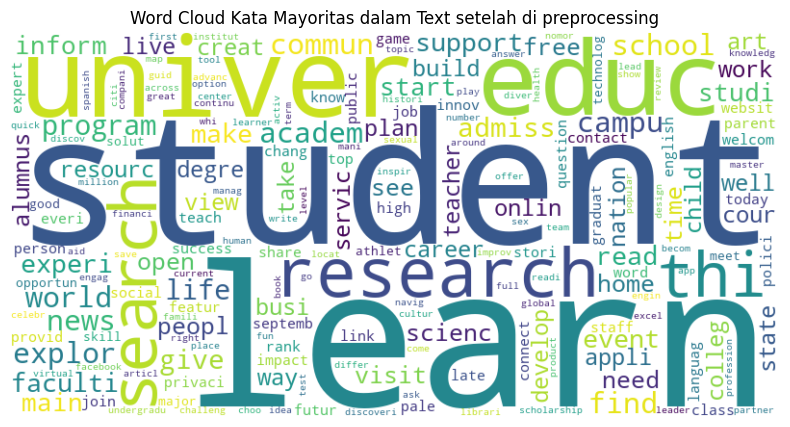

In [11]:
tes = df['text'].to_list()
# Menggabungkan semua kata dalam kolom tweet
all_words = ' '.join(tes)

# Membuat objek WordCloud
wordcloud = WordCloud(width=800, height=400, collocations=False, background_color='white').generate(all_words)

# Menampilkan Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Kata Mayoritas dalam Text setelah di preprocessing')
plt.show()

In [12]:
# Buka file teks
with open('tambahan.txt', 'r') as file:
    # Baca setiap baris dalam file dan hapus karakter newline (newline)
    tambahan = [line.strip() for line in file]

# Menghapus stopwords dari kolom 'text'
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in tambahan]))

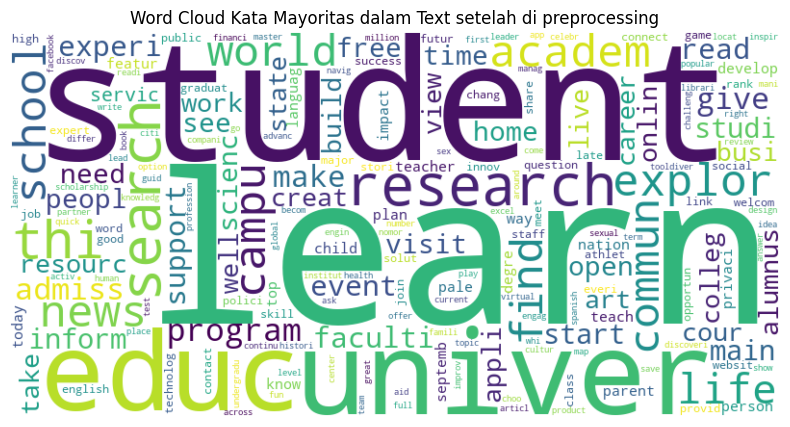

In [13]:
tes = df['text'].to_list()
# Menggabungkan semua kata dalam kolom tweet
all_words = ' '.join(tes)

# Membuat objek WordCloud
wordcloud = WordCloud(width=800, height=400, collocations=False, background_color='white').generate(all_words)

# Menampilkan Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Kata Mayoritas dalam Text setelah di preprocessing')
plt.show()

In [14]:
df.shape

(180, 2)

In [15]:
df['text'][178]

"home zeniu insight campu subject exam tip teacher sabrina mulia rhamadanti decemb complet elementari school class summari thi articl summar complet summar includ mathematics , science , indonesian , english , hope make easy child parent prepar learn need elementari school child good choic foster good relationship , monitor child ' growth develop know complet get school , teacher , tabl mathematic , deni basic wrong , studi elementari school elementari school . parent introduc materi simpl number , introduct well . lot relat activ daili environ stage get involv introduct number , light addition , subtract system form good , special hous aim stimul cognit abil discov daili life count unit time"